# Python for (open) Neuroscience

_Lecture 2.2_ - Working with image data

Luigi Petrucco

Jean-Charles Mariani

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/lectures/Lecture2.0_Real-world-Python.ipynb)

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Images/Imaging data

Imaging data pops out in many different places!

Anatomy...
<img src="https://nordiclifescience.org/wp-content/public_html/2020/03/2004OEKG30Mar-Global-winner-Ainara-Pintor-immunostaining-of-a-mouse-brain-slice-with-two-fluorophores-e1585637968987-760x380.jpg"  width="300">

Functional imaging...
<img src="https://hazimsos.files.wordpress.com/2014/02/brain_500.gif"  width="300">


Behavior / video analysis...
<img src="https://edspace.american.edu/openbehavior/wp-content/uploads/sites/1502/2020/12/3mice.gif"  width="300">

Visual tasks...
<img src="https://www.jneurosci.org/content/jneuro/42/43/8125/F1.large.jpg"  width="300">


## Working with images

When we work with any kind of image, or stacks of images, we have to think about them as matrices. 

Numbers in the matrix map the intensity of the signal at every pixel.

![animal](./files/imageschema.png)

If the image is a plain 2D, **monocromatic image**, the data is a (height, width) matrix.

### Common image formats

- `.png`: 2D colored images, LOSS-LESS compression
- `.jpeg`: 2D colored images, LOSSY compression format - we loose some information at high levels of compression!
- `.tiff`: both 2D, 3D, or ND images, common for image stacks (volumes, timelapses...)

### Scientific imaging formats
- `.nrrd` (imaging data)
- `.nii.gz` (imaging data)
- `.ome.tiff` (microscopy data)
- ...endless others

## Libraries to work with images

There are countless packages to read and write images!What you choose will depend a lot on the actual data and libraries you will be working with. The most common ones:

- `PIL`: RGB images
- `tifffile`: `.tiff` files and image stacks
- `imageio`: RGB images, `.tiff` files and image stacks
- `nibabel`: `.nii.gz` imaging data
- `opencv`: any kind of image

### Image readers

Most packages provide us with an image reader class.

We instantiate a reader object from our data file, and we use its methods to read it!

### The `PIL` package

In [2]:
# To use this package, first `conda install -c conda-forge Pillow` or `pip install Pillow` from the terminal
import PIL

Let's have a look at a simple `.jpeg` image! To work with plain images, `Pillow` is an excellent and very powerful library.

In [2]:
from PIL import Image
img = Image.open("./files/octopus.jpg")  # this creates an image object
type(img)

PIL.JpegImagePlugin.JpegImageFile

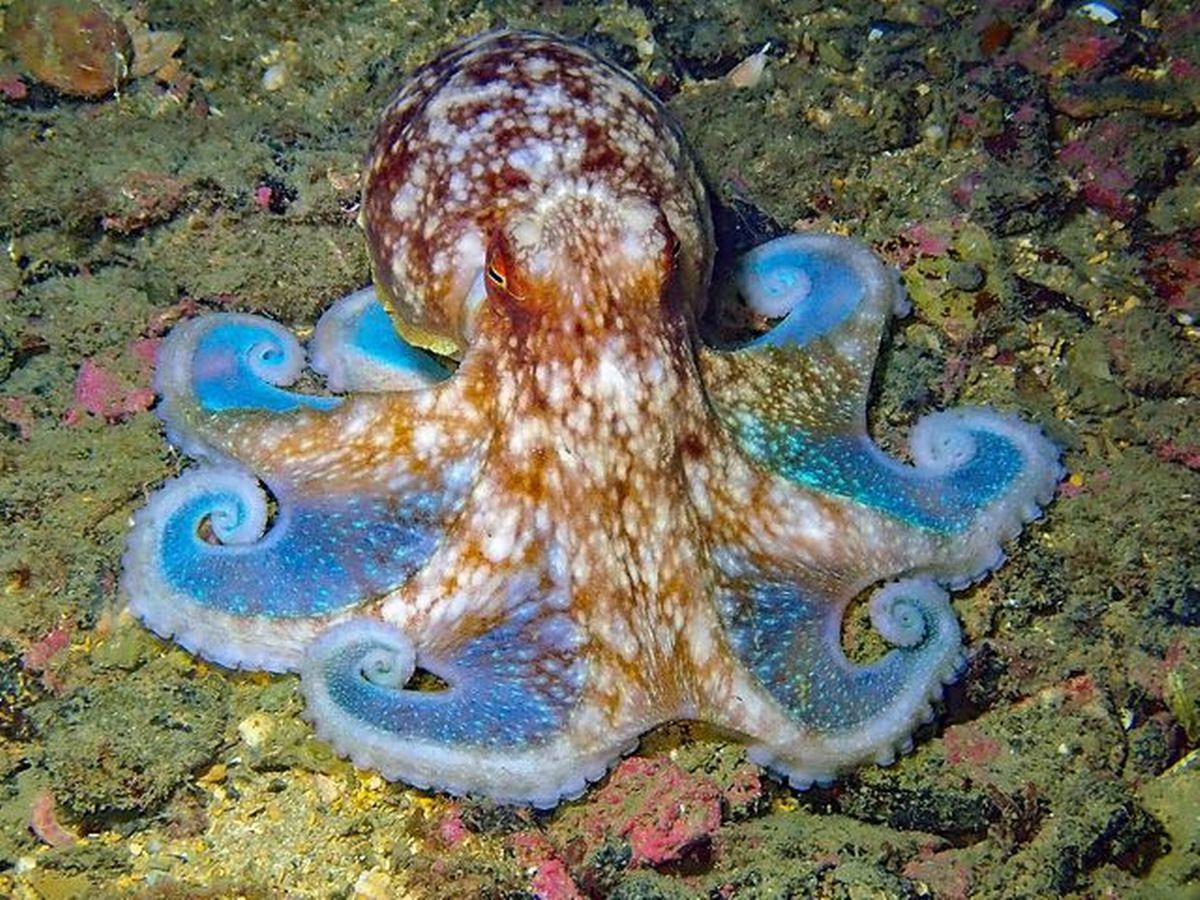

In [3]:
img  # instead of printing this will directly show the color image in the notebook!

### Image metadata

Metadata have different degrees of sofistication depending on where your image is from. Often your data acquisition devices save images with a bunch of parameters about the acquisition, that are kept in the image metadata.

Here we just have some info about the jpeg compression:

In [4]:
img.info

{'jfif': 258, 'jfif_version': (1, 2), 'jfif_unit': 0, 'jfif_density': (1, 1)}

### Image data content

Your reader will then have a method to retrieve the actual image data as an array. In this case, we can directly convert it to a numpy array:

In [7]:
import numpy as np
# Convert image to numpy array:
data_array = np.array(img)
data_array.shape

(900, 1200, 3)

## Image dimensions

If the image is a plain 2D, monocromatic image, the data is a (height, width) matrix.

Additional dimensions can encode:
 - **different channels** (typically 3 for RGB images, 4 for RGBA images (with transparency), but depends on the data)
 - **the depth** (if the data is volumetric)
 - **the time axis** (if the data is acquired through time as in a video)

In our case, since this is an RGB image, the shape will be (heigth, width, channels). We use three different channels (R,G,B to encode the color).

In [8]:
data_array.shape

(900, 1200, 3)

### Color spaces

[Color spaces](https://en.wikipedia.org/wiki/Color_space) are generally considered 3D business (at least)! As in, we always need triplets to encode a color. RGB is not the only option, there's other spaces:
- `RGB`: Red, Green, Blue - monitors
- `CMYK`: Cyan, Magenta, Yellow, Black - printers
- `HLS`: Hue, Luminance, Saturation - the only one that makes sense

Maybe we'll see them again in the lecture on data visualization!

Let's have a look at each channel in our RGB data!

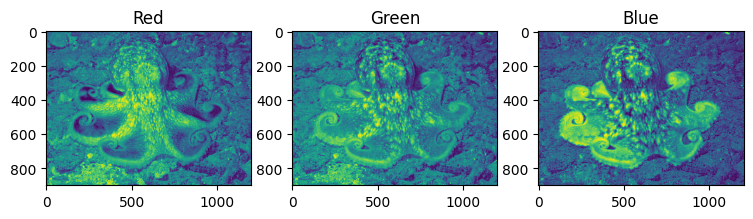

In [334]:
# In those plots, the colors are arbitrary:
f, axs = plt.subplots(1, 3, figsize=(9, 4))

for channel_i, (ax, title) in enumerate(zip(axs, ["Red", "Green", "Blue"])):
    ax.imshow(data_array[:, :,channel_i])
    ax.set(title=title)

If we pass a 3D array with 3 elements over the third axis to plt.imshow, it will assume it is an RGB image and represents it as such!

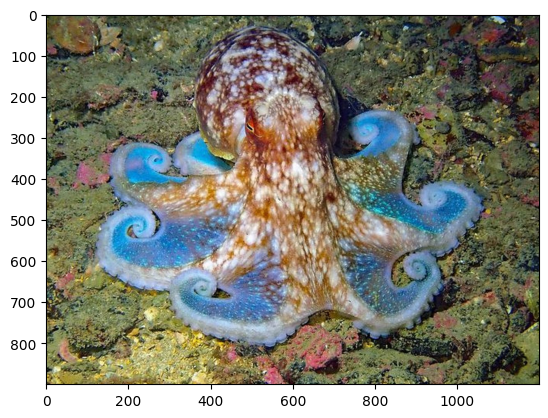

In [221]:
# Here we pass an RGB image, so imshow knows what the real colors are:
plt.figure()
plt.imshow(data_array)

### Images axes conventions

In images we encode rows top to bottom, and columns left to right!

- **Image coordinates**: `i, j` (`i` top >> bottom, `j` left >> right);

- **Cartesian coordinates**: `x, y` (`x` left >> right, `y` bottom >> top);

The `0, 0` pixel in an image is the top left corner; the `0, 0` coordinate is the bottom left coordinate of the plane:

![animal](./files/imageschema-02.png)

Sometimes this can be VERY CONFUSING if you are working with images!

## The image bit depth

Pixel are encoded with a specific number of bits!

The higher the number of bits, the more possible values the image pixel can have, the heavier your data will be.

The number of bits encoding each pixel is called the bit depth of the image! 

Typical depths are either 8 (values from 0 to 255) or 16 (values from 0 to 65535). Different file formats support different bit depths.

The bit depth will correspond with the `dtype` of our array! In our case:

In [9]:
data_array.dtype

dtype('uint8')

### The image histogram

A common way to describe an image is the image histogram. This is just the distribution of pixel values over the range defined by the bit depth.

Let's create a monocromatic (grayscale) image from the red channel:

In [10]:
grayscale_img =  data_array[:, :,0]

We can now look at the histogram for this image by:

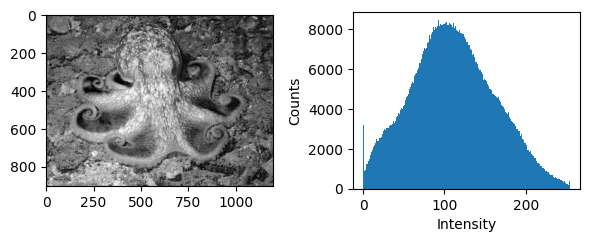

In [12]:
from matplotlib import pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(6, 2.5))
axs[1].hist(grayscale_img.flatten(), np.arange(255))
axs[0].imshow(grayscale_img, cmap="gray")
axs[1].set(xlabel="Intensity", ylabel="Counts")
plt.tight_layout()

Remember that the maximum value that we can encode in this array is 255!! If for any reason values get shifted above this number, python takes the 255 module of the new values:

In [13]:
shifted_img = grayscale_img + 100

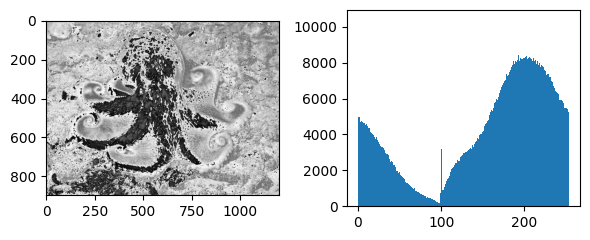

In [14]:
_, axs = plt.subplots(1, 2, figsize=(6, 2.5))
axs[1].hist(shifted_img.flatten(), np.arange(255))
axs[0].imshow(shifted_img, cmap="gray")
plt.tight_layout()

To prevent this, we have to change the dtype of the stack before shifting it. **This will increase the space needed to store it in memory!**

In [15]:
shifted_img = grayscale_img.astype(np.uint16) + 100

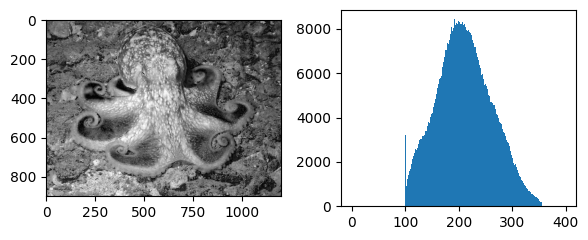

In [16]:
_, axs = plt.subplots(1, 2, figsize=(6, 2.5))

axs[1].hist(shifted_img.flatten(), np.arange(400))
axs[0].imshow(shifted_img, cmap="gray")
plt.tight_layout()

(a stupid thing in this case - we are using a larger bit depth but encoding the same value range!)

### A balanced image histogram

Being aware of how many bits are encoding our data is important to make sure we use them well

Sometimes an image can end up being **saturated** (e.g., over-exposed). In this case, values from the camera/imaging sistem are clipped to the maximum value of our bit depth. This is bad - we loose information!

In [18]:
def get_saturated_img(img):
    shifted_img = img.astype(np.uint16)*1.4
    shifted_img[shifted_img >= 255] = 255
    return shifted_img

def get_underexposed_img(img):
    return img // 80

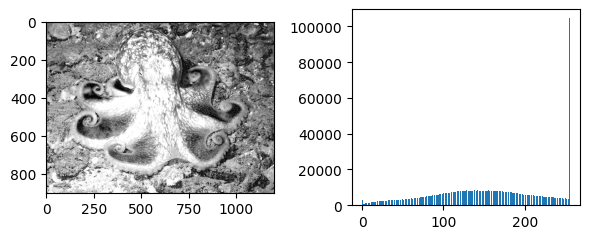

In [19]:
saturated = get_saturated_img(grayscale_img)  # a saturated image

_, axs = plt.subplots(1, 2, figsize=(6, 2.5))
axs[1].hist(saturated.flatten(), np.arange(256))
axs[0].imshow(saturated, cmap="gray")
plt.tight_layout()

Other times, we might not be using well all the levels available in our encoding:

In [21]:
underexposed = get_underexposed_img(grayscale_img)  # an underexposed image

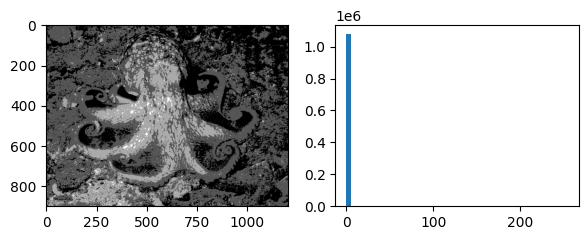

In [22]:

_, axs = plt.subplots(1, 2, figsize=(6, 2.5))
axs[1].hist(underexposed.flatten(), np.arange(0, 256, 5))
axs[0].imshow(underexposed, cmap="gray")
plt.tight_layout()

## Binary images

We can create binary (`True`/`False`) images:

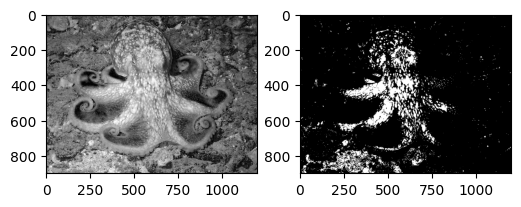

In [23]:
THRESHOLD = 180
binarized = grayscale_img > THRESHOLD
_, axs = plt.subplots(1, 2, figsize=(6, 2.5))
axs[0].imshow(grayscale_img, cmap="gray")
axs[1].imshow(binarized, cmap="gray")
plt.show()

It is common to use a binary image as a mask for further data processing. For example, we can look at the RGB image after masking it with the binarized image

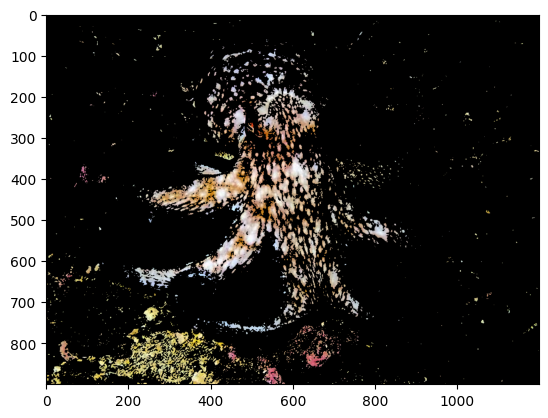

In [24]:
masked_rgb_img = img * binarized[:, :, np.newaxis]  # note how here we use broadcasting!
plt.figure()
plt.imshow(masked_rgb_img)

(Practical 2.2.0)

## Creating images with Pillow

Sometimes we might need to generate images programmatically. The Pillow library is a great way to do this!

In [25]:
from PIL import Image, ImageDraw, ImageFont

# an empty image with a background color:
pil_img  = Image.new( mode = "RGB", size=(400, 300), color=(200,)*3)

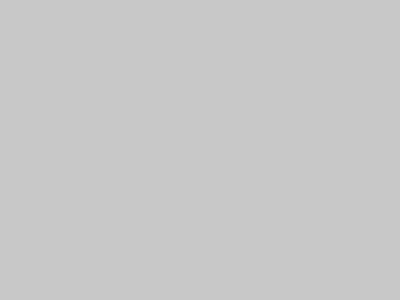

In [26]:
# We can look at the image in a cell just by putting it at the end of a cell:
pil_img

Let's create a Draw() object to paint stuff on our empty image:

In [28]:
draw = ImageDraw.Draw(pil_img)  # painter object to draw stuff on our image

We can now create shapes on the image!

In [29]:
draw.ellipse((125, 100, 175, 150), fill=(174, 48, 51), outline=None, width=2)
draw.rectangle((225, 100, 275, 150), fill=None, outline=(174, 48, 51))

for i in range(3):
    draw.line((100+i*40, 200+i*10, 300-i*40, 200+i*10), fill=(174, 48, 51), width=2)

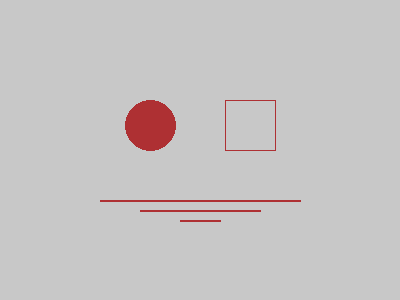

In [30]:
pil_img

We can also include text!

In [31]:
font = ImageFont.truetype("LibertinusSans-Regular.otf", 40)
draw.text((95, 20), "Hello World.", fill=(240, )*3, font=font)  # add text to the image

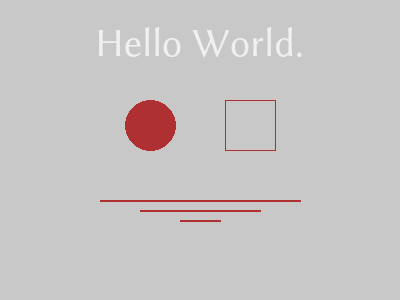

In [32]:
pil_img

There's many other things we can do with Pillow!
 - resize images
 - combine multiple images
 - mask images
 - frame-by-frame animations 
 - ...

(Practicals 2.2.1)

## Manipulating images as numpy arrays

We can also just work with images as if they were numpy arrays. E.g., for cropping them we can just index them:

In [159]:
crop_img = grayscale_img[:400, :]

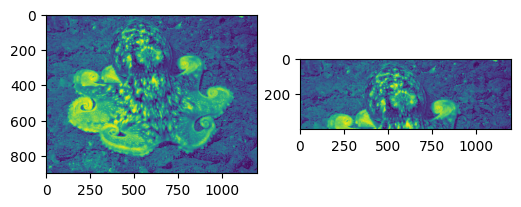

In [169]:
f, axs = plt.subplots(1,2, figsize=(6, 3))
for ax, im in zip(axs, [grayscale_img, crop_img]):
    ax.imshow(im)

To rotate them 90 degrees:

In [170]:
rot_img = np.rot90(grayscale_img)

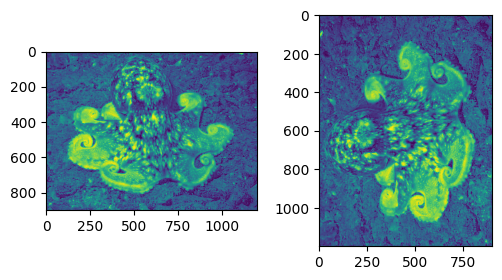

In [168]:
f, axs = plt.subplots(1,2, figsize=(6, 3))
for ax, im in zip(axs, [grayscale_img, rot_img]):
    ax.imshow(im)

### Image convolution

There's a bunch of cool operations we can perform by convolving images with a certain kernel:

- blur an image (denoise)
- edge detection
- binary mask erosion or contraction
- ...

### Advanced video analysis

There's  great ML tools to perform advanced segmentation in an automatic ways! Make sure you read what your options are before starting doing a lot of manual work :)

SegmentAnything

<img src="https://aicurious.io/posts-data/2023-04-22-create-a-segment-anything-labeling-tool-any-labeling/ezgif-2-6b2f1c5a89.gif"  width="400">

DeepLabCut
<img src="https://edspace.american.edu/openbehavior/wp-content/uploads/sites/1502/2020/12/3mice.gif"  width="400">